<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Yahoo-S5-DataSet-–-Yahoo-Research-Lab" data-toc-modified-id="Yahoo-S5-DataSet-–-Yahoo-Research-Lab-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Yahoo S5 DataSet – Yahoo Research Lab</a></span><ul class="toc-item"><li><span><a href="#Line-Charts" data-toc-modified-id="Line-Charts-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Line Charts</a></span></li><li><span><a href="#Box-Plots" data-toc-modified-id="Box-Plots-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Box Plots</a></span></li><li><span><a href="#Box-plots-in-a-loop" data-toc-modified-id="Box-plots-in-a-loop-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Box plots in a loop</a></span></li></ul></li><li><span><a href="#NASA-Statlog-Shuttle-Dataset-–-UCI" data-toc-modified-id="NASA-Statlog-Shuttle-Dataset-–-UCI-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>NASA Statlog Shuttle Dataset – UCI</a></span></li><li><span><a href="#Domains-of-application" data-toc-modified-id="Domains-of-application-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Domains of application</a></span></li><li><span><a href="#Time-Series-Features-and-Attributes" data-toc-modified-id="Time-Series-Features-and-Attributes-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Time Series Features and Attributes</a></span><ul class="toc-item"><li><span><a href="#Trend" data-toc-modified-id="Trend-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Trend</a></span></li><li><span><a href="#Seasonality" data-toc-modified-id="Seasonality-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Seasonality</a></span></li></ul></li><li><span><a href="#Analysis-Methods-and-Approaches" data-toc-modified-id="Analysis-Methods-and-Approaches-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Analysis Methods and Approaches</a></span></li><li><span><a href="#Estimation-and-Accuracy-methods" data-toc-modified-id="Estimation-and-Accuracy-methods-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Estimation and Accuracy methods</a></span></li></ul></div>

In [1]:
import glob
from datetime import datetime
import pandas as pd
from matplotlib import pyplot as plt


# Yahoo S5 DataSet – Yahoo Research Lab 

Released Date: 2015 

Designed for: Benchmarking Anomaly Detection 

Size: 16 MB 

5 folders of Time Series, both real and synthetic. 

Folder 1: The real TS – Metrics of Yahoo services (Server Traffic) 

Folders 2-4: Synthetic TS with varying anomaly types including outliers and change-points. 

In [4]:
start_time = datetime.now()
A1 = glob.glob(f'../data/yahoo/dataset/ydata-labeled-time-series-anomalies-v1_0/A1Benchmark/**/*.csv', recursive=True)
A2 = glob.glob(f'../data/yahoo/dataset/ydata-labeled-time-series-anomalies-v1_0/A2Benchmark/**/*.csv', recursive=True)
A3 = glob.glob(f'../data/yahoo/dataset/ydata-labeled-time-series-anomalies-v1_0/A3Benchmark/**/A3Benchmark-TS*.csv', recursive=True)
A4 = glob.glob(f'../data/yahoo/dataset/ydata-labeled-time-series-anomalies-v1_0/A4Benchmark/**/A4Benchmark-TS*.csv', recursive=True)
end_time = datetime.now()
print(f'Loaded the paths of {len(A1) + len(A2) + len(A3) + len(A4) + len(A5)} files from disk. Took {end_time-start_time}')

Loaded the paths of 367 files from disk. Took 0:00:00.018950


In [17]:
all_csv = A1 + A2 + A3 + A4

In [18]:
len(all_csv)

367

## Line Charts

../data/yahoo/dataset/ydata-labeled-time-series-anomalies-v1_0/A1Benchmark\real_1.csv 
                         value  is_anomaly
timestamp                                
1970-01-01 00:00:01  0.000000           0
1970-01-01 00:00:02  0.091758           0
1970-01-01 00:00:03  0.172297           0
1970-01-01 00:00:04  0.226219           0
1970-01-01 00:00:05  0.176358           0


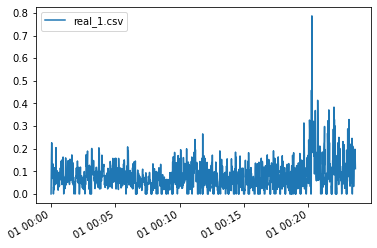

../data/yahoo/dataset/ydata-labeled-time-series-anomalies-v1_0/A1Benchmark\real_10.csv 
                         value  is_anomaly
timestamp                                
1970-01-01 00:00:01  9.188383           0
1970-01-01 00:00:02  9.229168           0
1970-01-01 00:00:03  9.312127           0
1970-01-01 00:00:04  9.149372           0
1970-01-01 00:00:05  8.945770           0


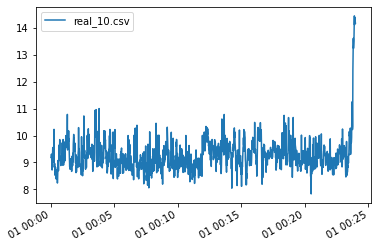

../data/yahoo/dataset/ydata-labeled-time-series-anomalies-v1_0/A1Benchmark\real_11.csv 
                      value  is_anomaly
timestamp                             
1970-01-01 00:00:01  13684           0
1970-01-01 00:00:02  12337           0
1970-01-01 00:00:03  12416           0
1970-01-01 00:00:04  13126           0
1970-01-01 00:00:05  14552           0


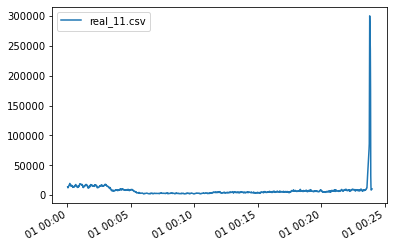

In [38]:
for ts in all_csv[:3]:
    df = pd.read_csv(ts)
    df['timestamp'] = pd.to_datetime(df['timestamp'],unit='s')#format='%f' if formatting required upto nanoseconds
    df_indexed = df.set_index('timestamp')
    print(ts,"\n",df_indexed.head())
    plt.plot(df_indexed.index,df_indexed['value'])
    plt.xlabel="Date"
    plt.ylabel="Server Traffic"
    plt.gcf().autofmt_xdate()
    filename = ts.split("\\")[1]
    plt.legend((filename,))
    plt.show()

../data/yahoo/dataset/ydata-labeled-time-series-anomalies-v1_0/A2Benchmark\synthetic_39.csv 
                           value  is_anomaly
timestamp                                  
2014-11-23 07:00:00 -237.727692           0
2014-11-23 08:00:00  151.256879           0
2014-11-23 09:00:00 -175.182181           0
2014-11-23 10:00:00  847.119319           0
2014-11-23 11:00:00  423.598218           0


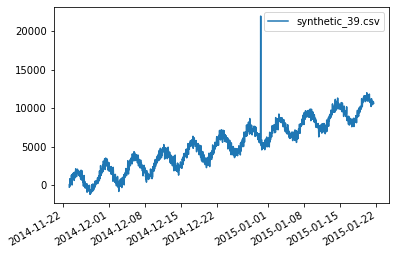

../data/yahoo/dataset/ydata-labeled-time-series-anomalies-v1_0/A2Benchmark\synthetic_4.csv 
                           value  is_anomaly
timestamp                                  
2014-11-23 07:00:00   52.606331           0
2014-11-23 08:00:00   53.295687           0
2014-11-23 09:00:00  186.898748           0
2014-11-23 10:00:00  249.971957           0
2014-11-23 11:00:00  279.808264           0


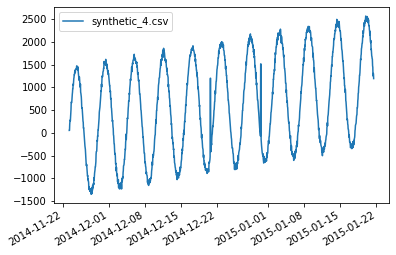

../data/yahoo/dataset/ydata-labeled-time-series-anomalies-v1_0/A2Benchmark\synthetic_40.csv 
                           value  is_anomaly
timestamp                                  
2014-11-23 07:00:00  508.681619           0
2014-11-23 08:00:00  -52.044324           0
2014-11-23 09:00:00  688.353631           0
2014-11-23 10:00:00  741.258885           0
2014-11-23 11:00:00  472.570612           0


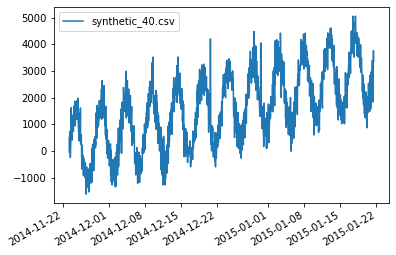

In [41]:
for ts in all_csv[100:103]:
    df = pd.read_csv(ts)
    df['timestamp'] = pd.to_datetime(df['timestamp'],unit='s')#format='%f' if formatting required upto nanoseconds
    df_indexed = df.set_index('timestamp')
    print(ts,"\n",df_indexed.head())
    plt.plot(df_indexed.index,df_indexed['value'])
    plt.xlabel="Date"
    plt.ylabel="Server Traffic"
    plt.gcf().autofmt_xdate()
    filename = ts.split("\\")[1]
    plt.legend((filename,))
    plt.show()

../data/yahoo/dataset/ydata-labeled-time-series-anomalies-v1_0/A3Benchmark\A3Benchmark-TS39.csv 
                           value  anomaly  changepoint  trend      noise  \
timestamps                                                                
2014-11-23 06:00:00  -23.896975        0            0      1 -24.896975   
2014-11-23 07:00:00   35.008431        0            0      2 -23.620730   
2014-11-23 08:00:00  103.274967        0            0      3  -1.484454   
2014-11-23 09:00:00  113.414036        0            0      4 -17.341198   
2014-11-23 10:00:00  177.336720        0            0      5  44.381406   

                     seasonality1  seasonality2  seasonality3  
timestamps                                                     
2014-11-23 06:00:00      0.000000      0.000000      0.000000  
2014-11-23 07:00:00     38.850000     15.943253      1.835908  
2014-11-23 08:00:00     67.290174     30.800000      3.669248  
2014-11-23 09:00:00     77.700000     43.557778      5.4

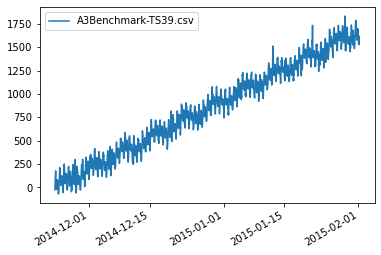

../data/yahoo/dataset/ydata-labeled-time-series-anomalies-v1_0/A3Benchmark\A3Benchmark-TS4.csv 
                           value  anomaly  changepoint  trend       noise  \
timestamps                                                                 
2014-11-23 06:00:00   -6.129439        0            0      2   -8.129439   
2014-11-23 07:00:00  251.488637        0            0      4 -116.677130   
2014-11-23 08:00:00  645.865406        0            0      6  -16.685755   
2014-11-23 09:00:00  834.902321        0            0      8    3.795412   
2014-11-23 10:00:00  891.027367        0            0     10   40.430447   

                     seasonality1  seasonality2  seasonality3  
timestamps                                                     
2014-11-23 06:00:00      0.000000      0.000000      0.000000  
2014-11-23 07:00:00    239.850000    109.946330     14.369436  
2014-11-23 08:00:00    415.432386    212.400000     28.718775  
2014-11-23 09:00:00    479.700000    300.378961   

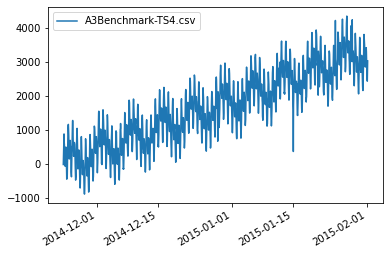

../data/yahoo/dataset/ydata-labeled-time-series-anomalies-v1_0/A3Benchmark\A3Benchmark-TS40.csv 
                           value  anomaly  changepoint  trend      noise  \
timestamps                                                                
2014-11-23 06:00:00   -3.638928        0            0     -2  -1.638928   
2014-11-23 07:00:00  120.277120        0            0     -4 -19.876459   
2014-11-23 08:00:00  264.945700        0            0     -6  11.896583   
2014-11-23 09:00:00  342.597229        0            0     -8  27.933724   
2014-11-23 10:00:00  273.869750        0            0    -10 -41.676317   

                     seasonality1  seasonality2  seasonality3  
timestamps                                                     
2014-11-23 06:00:00      0.000000      0.000000      0.000000  
2014-11-23 07:00:00     97.900000     44.361584      1.891994  
2014-11-23 08:00:00    169.567774     85.700000      3.781343  
2014-11-23 09:00:00    195.800000    121.198102      5.6

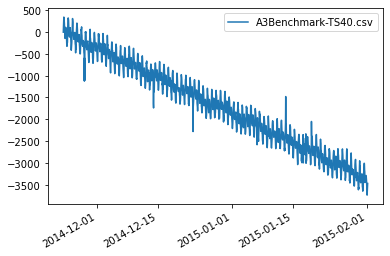

In [46]:
for ts in all_csv[200:203]:
    df = pd.read_csv(ts)
    df['timestamps'] = pd.to_datetime(df['timestamps'],unit='s')#format='%f' if formatting required upto nanoseconds
    df_indexed = df.set_index('timestamps')
    print(ts,"\n",df_indexed.head())
    plt.plot(df_indexed.index,df_indexed['value'])
    plt.xlabel="Date"
    plt.gcf().autofmt_xdate()
    filename = ts.split("\\")[1]
    plt.legend((filename,))
    plt.show()

In [47]:
df

,timestamps,value,anomaly,changepoint,trend,noise,seasonality1,seasonality2,seasonality3
0,2014-11-23 06:00:00,-3.638928,0,0,-2,-1.638928,0.000000,0.000000,0.000000
1,2014-11-23 07:00:00,120.277120,0,0,-4,-19.876459,97.900000,44.361584,1.891994
2,2014-11-23 08:00:00,264.945700,0,0,-6,11.896583,169.567774,85.700000,3.781343
3,2014-11-23 09:00:00,342.597229,0,0,-8,27.933724,195.800000,121.198102,5.665402
4,2014-11-23 10:00:00,273.869750,0,0,-10,-41.676317,169.567774,148.436754,7.541539
...,...,...,...,...,...,...,...,...,...
1675,2015-02-01 01:00:00,-3582.997620,0,0,-3352,41.869194,-97.900000,-165.559687,-9.407127
1676,2015-02-01 02:00:00,-3737.444071,0,0,-3354,-57.898004,-169.567774,-148.436754,-7.541539
1677,2015-02-01 03:00:00,-3651.055822,0,0,-3356,27.607682,-195.800000,-121.198102,-5.665402
1678,2015-02-01 04:00:00,-3542.574654,0,0,-3358,74.474463,-169.567774,-85.700000,-3.781343


../data/yahoo/dataset/ydata-labeled-time-series-anomalies-v1_0/A4Benchmark\A4Benchmark-TS39.csv 
                           value  anomaly  changepoint  trend      noise  \
timestamps                                                                
2014-11-23 06:00:00   91.799232        0            0      2  89.799232   
2014-11-23 07:00:00  275.703854        0            0      4 -53.094990   
2014-11-23 08:00:00  617.743090        0            0      6  31.261524   
2014-11-23 09:00:00  719.240523        0            0      8  -4.169186   
2014-11-23 10:00:00  723.182843        0            0     10   4.895080   

                     seasonality1  seasonality2  seasonality3  
timestamps                                                     
2014-11-23 06:00:00      0.000000      0.000000      0.000000  
2014-11-23 07:00:00    238.500000     76.248091     10.050753  
2014-11-23 08:00:00    413.094118    147.300000     20.087449  
2014-11-23 09:00:00    477.000000    208.313658     30.0

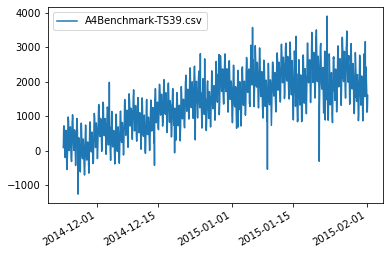

../data/yahoo/dataset/ydata-labeled-time-series-anomalies-v1_0/A4Benchmark\A4Benchmark-TS4.csv 
                           value  anomaly  changepoint  trend       noise  \
timestamps                                                                 
2014-11-23 06:00:00   -6.129439        0            0      2   -8.129439   
2014-11-23 07:00:00  251.488637        0            0      4 -116.677130   
2014-11-23 08:00:00  645.865406        0            0      6  -16.685755   
2014-11-23 09:00:00  834.902321        0            0      8    3.795412   
2014-11-23 10:00:00  891.027367        0            0     10   40.430447   

                     seasonality1  seasonality2  seasonality3  
timestamps                                                     
2014-11-23 06:00:00      0.000000      0.000000      0.000000  
2014-11-23 07:00:00    239.850000    109.946330     14.369436  
2014-11-23 08:00:00    415.432386    212.400000     28.718775  
2014-11-23 09:00:00    479.700000    300.378961   

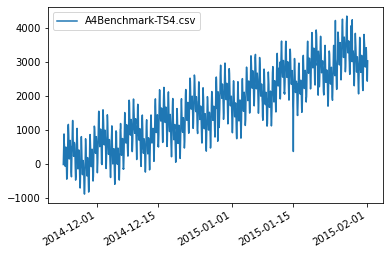

../data/yahoo/dataset/ydata-labeled-time-series-anomalies-v1_0/A4Benchmark\A4Benchmark-TS40.csv 
                           value  anomaly  changepoint  trend      noise  \
timestamps                                                                
2014-11-23 06:00:00   21.002758        0            0      3  18.002758   
2014-11-23 07:00:00   95.897706        0            0      6  24.380045   
2014-11-23 08:00:00  101.915175        0            0      9 -23.917643   
2014-11-23 09:00:00  138.332812        0            0     12 -17.003903   
2014-11-23 10:00:00  176.396830        0            0     15  20.737253   

                     seasonality1  seasonality2  seasonality3  
timestamps                                                     
2014-11-23 06:00:00      0.000000      0.000000      0.000000  
2014-11-23 07:00:00     49.050000     15.529143      0.938519  
2014-11-23 08:00:00     84.957092     30.000000      1.875725  
2014-11-23 09:00:00     98.100000     42.426407      2.8

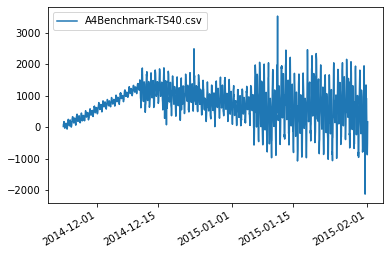

In [48]:
for ts in all_csv[300:303]:
    df = pd.read_csv(ts)
    df['timestamps'] = pd.to_datetime(df['timestamps'],unit='s')#format='%f' if formatting required upto nanoseconds
    df_indexed = df.set_index('timestamps')
    print(ts,"\n",df_indexed.head())
    plt.plot(df_indexed.index,df_indexed['value'])
    plt.xlabel="Date"
    plt.gcf().autofmt_xdate()
    filename = ts.split("\\")[1]
    plt.legend((filename,))
    plt.show()

## Box Plots

In [96]:
df = df_indexed[['value']]
df['period'] = df.index.to_period('M')

groupeddf = df.groupby(df['period'])
#print(groupeddf)

for month, monthdf in groupeddf:
    print(month)
    print("",monthdf)

2014-11
                           value   period
timestamps                              
2014-11-23 06:00:00   21.002758  2014-11
2014-11-23 07:00:00   95.897706  2014-11
2014-11-23 08:00:00  101.915175  2014-11
2014-11-23 09:00:00  138.332812  2014-11
2014-11-23 10:00:00  176.396830  2014-11
...                         ...      ...
2014-11-30 19:00:00  582.267213  2014-11
2014-11-30 20:00:00  600.279356  2014-11
2014-11-30 21:00:00  620.982031  2014-11
2014-11-30 22:00:00  591.530741  2014-11
2014-11-30 23:00:00  551.502076  2014-11

[186 rows x 2 columns]
2014-12
                            value   period
timestamps                               
2014-12-01 00:00:00   525.690563  2014-12
2014-12-01 01:00:00   476.648664  2014-12
2014-12-01 02:00:00   422.688747  2014-12
2014-12-01 03:00:00   447.402563  2014-12
2014-12-01 04:00:00   462.349030  2014-12
...                          ...      ...
2014-12-31 19:00:00  1006.262916  2014-12
2014-12-31 20:00:00  1134.566045  2014-12
2014-

C:\Users\Sanke\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


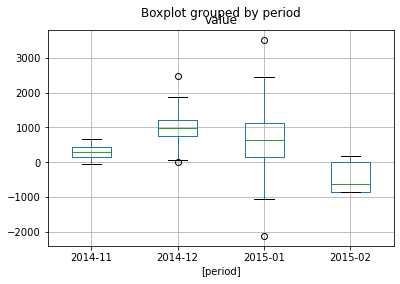

In [95]:
df.boxplot(by='period')
plt.xlabel='Month'
plt.ylabel='Precipitation(mm)'
#plt.title('Month vs Precipitation across all years')

## Box plots in a loop

../data/yahoo/dataset/ydata-labeled-time-series-anomalies-v1_0/A4Benchmark\A4Benchmark-TS39.csv 
                           value  anomaly  changepoint  trend      noise  \
timestamps                                                                
2014-11-23 06:00:00   91.799232        0            0      2  89.799232   
2014-11-23 07:00:00  275.703854        0            0      4 -53.094990   
2014-11-23 08:00:00  617.743090        0            0      6  31.261524   
2014-11-23 09:00:00  719.240523        0            0      8  -4.169186   
2014-11-23 10:00:00  723.182843        0            0     10   4.895080   

                     seasonality1  seasonality2  seasonality3  
timestamps                                                     
2014-11-23 06:00:00      0.000000      0.000000      0.000000  
2014-11-23 07:00:00    238.500000     76.248091     10.050753  
2014-11-23 08:00:00    413.094118    147.300000     20.087449  
2014-11-23 09:00:00    477.000000    208.313658     30.0

C:\Users\Sanke\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


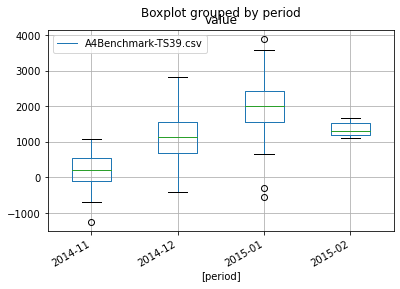

../data/yahoo/dataset/ydata-labeled-time-series-anomalies-v1_0/A4Benchmark\A4Benchmark-TS4.csv 
                           value  anomaly  changepoint  trend       noise  \
timestamps                                                                 
2014-11-23 06:00:00   -6.129439        0            0      2   -8.129439   
2014-11-23 07:00:00  251.488637        0            0      4 -116.677130   
2014-11-23 08:00:00  645.865406        0            0      6  -16.685755   
2014-11-23 09:00:00  834.902321        0            0      8    3.795412   
2014-11-23 10:00:00  891.027367        0            0     10   40.430447   

                     seasonality1  seasonality2  seasonality3  
timestamps                                                     
2014-11-23 06:00:00      0.000000      0.000000      0.000000  
2014-11-23 07:00:00    239.850000    109.946330     14.369436  
2014-11-23 08:00:00    415.432386    212.400000     28.718775  
2014-11-23 09:00:00    479.700000    300.378961   

C:\Users\Sanke\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


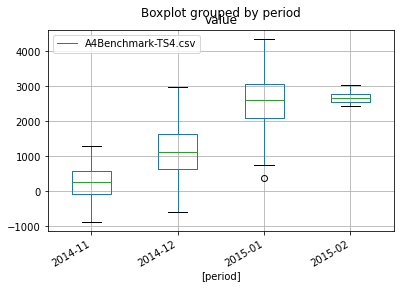

../data/yahoo/dataset/ydata-labeled-time-series-anomalies-v1_0/A4Benchmark\A4Benchmark-TS40.csv 
                           value  anomaly  changepoint  trend      noise  \
timestamps                                                                
2014-11-23 06:00:00   21.002758        0            0      3  18.002758   
2014-11-23 07:00:00   95.897706        0            0      6  24.380045   
2014-11-23 08:00:00  101.915175        0            0      9 -23.917643   
2014-11-23 09:00:00  138.332812        0            0     12 -17.003903   
2014-11-23 10:00:00  176.396830        0            0     15  20.737253   

                     seasonality1  seasonality2  seasonality3  
timestamps                                                     
2014-11-23 06:00:00      0.000000      0.000000      0.000000  
2014-11-23 07:00:00     49.050000     15.529143      0.938519  
2014-11-23 08:00:00     84.957092     30.000000      1.875725  
2014-11-23 09:00:00     98.100000     42.426407      2.8

C:\Users\Sanke\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


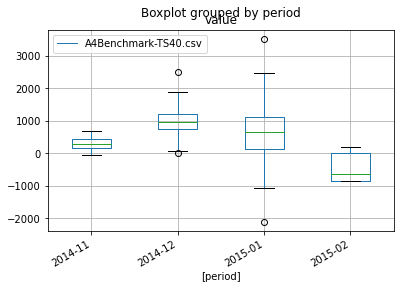

In [99]:
for ts in all_csv[300:303]:
    df = pd.read_csv(ts)
    df['timestamps'] = pd.to_datetime(df['timestamps'],unit='s')#format='%f' if formatting required upto nanoseconds
    df_indexed = df.set_index('timestamps')
    print(ts,"\n",df_indexed.head())
    df = df_indexed[['value']]
    df['period'] = df.index.to_period('M')
    groupeddf = df.groupby(df['period'])
    df.boxplot(by='period')
    #print(groupeddf)
    # for month, monthdf in groupeddf:
    #     print(month)
    #     print("",monthdf)
#     plt.xlabel='Month'
#     plt.ylabel='Precipitation(mm)'
    plt.gcf().autofmt_xdate()
    filename = ts.split("\\")[1]
    plt.legend((filename,))
    plt.show()


# NASA Statlog Shuttle Dataset – UCI  

 

Released Date: 2013(maybe) 

Designed for : Supervised Anomaly detection. 

Size: 1.77 MB 

The shuttle dataset describes radiator positions in a NASA space shuttle with 9 attributes and was designed for supervised anomaly detection.  

Besides the normal “radiator flow” class, about 20% of the original data describe abnormal situations.  

Training and test set are combined in a single big dataset, which has as a result 46,464 instances with 1.89% anomalies.
(cite from Goldstein, Markus, and Seiichi Uchida. "A comparative evaluation of unsupervised anomaly detection algorithms for multivariate data." PloS one 11.4 (2016): e0152173.) 

# Domains of application

We can see that though both the datasets cover the 

# Time Series Features and Attributes

## Trend

## Seasonality

# Analysis Methods and Approaches

# Estimation and Accuracy methods

A regression model provides an output based on a linear combination of input values
$$
\hat{y} = b_0 + b_1*X_1
$$

$$F_1 = 2 * \frac{precision + recall}{precision * recall} $$

$$precision = \frac{true\ positive}{true\ positive + false\ positive}$$

$$recall = \frac{true\ positive}{true\ positive + false\ negative}$$